In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
base_path = "/gdrive/My Drive/CS/Pengpol/"

In [0]:
np.random.seed(2018)

In [0]:
from sklearn import preprocessing
#load training data
dftraining = pd.read_csv(base_path + 'cleantrainreview.csv',index_col=0)
reviewtraining = dftraining['review']
ratingtraining = dftraining['rating']

#load test data
dftest = pd.read_csv(base_path +'cleantestreview.csv',index_col=0)
reviewtest = dftest['review']
ratingtest = dftest['rating']
Xfortest = reviewtest[pd.notnull(reviewtest)]
Yfortest = ratingtest[pd.notnull(reviewtest)]

In [6]:
dftraining.head()

,review,rating
0,side effect take combination bystolic mg fish oil,9.0
1,son halfway fourth week intuniv became concern...,8.0
2,used take another oral contraceptive pill cycl...,5.0
3,first time using form birth control glad went ...,8.0
4,suboxone completely turned life around feel he...,9.0


In [0]:
#Split data review dan ratingnya
X = reviewtraining[pd.notnull(reviewtraining)]
Y = ratingtraining[pd.notnull(reviewtraining)]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=8)

### Feature Extraction

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
#Vectorize
vectorizer = CountVectorizer()
X_training_vector = vectorizer.fit_transform(X_train)
print("Number of features:  %d" % len(vectorizer.vocabulary_))
X_test_vector = vectorizer.transform(X_test)

Number of features:  44272


In [0]:
#Feature Extraction using TFIDF
tfidftransformer = TfidfTransformer()
X_train_tfidf = tfidftransformer.fit_transform(X_training_vector)

## Prediction Model

### SVM

In [36]:
#SVM 

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                        ('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,
                        use_idf=True)),
                        ('clf-svm', SGDClassifier(loss='hinge',alpha=1e-3,random_state=0))])

text_clf_svm = text_clf_svm.fit(X_train.astype(str), y_train)
predictionsvm = text_clf_svm.predict(X_test.astype(str))
accuracy = accuracy_score(y_test, predictionsvm)
print ('Metode SVM')
print ('Accuracy:', accuracy)

Metode SVM
Accuracy: 0.7258524488530688


In [37]:
accuracy = accuracy_score(y_test, predictionsvm)
print ('Metode SVM')
print ('Accuracy validation:', accuracy)

Metode SVM
Accuracy validation: 0.7258524488530688


In [0]:
dftestsvm = dftest

In [0]:
svmpred = text_clf_svm.predict(reviewtest.astype(str))

In [53]:
dftestsvm['predicted rating'] =svmpred
dftestsvm.head()

,review,rating,predicted rating
0,tried antidepressants years citalopram fluoxet...,10.0,9.0
1,son crohn disease done well asacol complaints ...,8.0,8.0
2,quick reduction symptoms,9.0,9.0
3,contrave combines drugs used alcohol smoking o...,9.0,9.0
4,birth control one cycle reading reviews type s...,9.0,9.0


In [54]:
from sklearn import metrics
print(metrics.classification_report(ratingtest, svmpred))

              precision    recall  f1-score   support

         1.0       0.70      0.86      0.77      7299
         2.0       0.74      0.60      0.67      2334
         3.0       0.68      0.59      0.63      2205
         4.0       0.58      0.59      0.58      1659
         5.0       0.71      0.57      0.64      2710
         6.0       0.61      0.56      0.58      2119
         7.0       0.75      0.56      0.64      3091
         8.0       0.75      0.59      0.66      6156
         9.0       0.76      0.61      0.68      9177
        10.0       0.74      0.89      0.81     17016

    accuracy                           0.72     53766
   macro avg       0.70      0.64      0.67     53766
weighted avg       0.72      0.72      0.72     53766



In [0]:
cmsvm = metrics.confusion_matrix(ratingtest, svmpred)

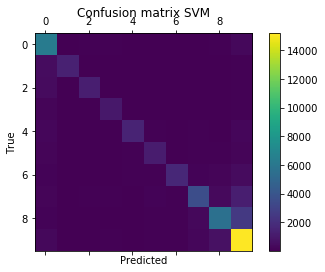

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmsvm)
plt.title('Confusion matrix SVM')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
accuracy_testsvm = accuracy_score(ratingtest, svmpred)

In [58]:
print('Akurasi testing svm:',accuracy_testsvm)

Akurasi testing svm: 0.7224826098277722


In [0]:
dftestsvm.to_csv(base_path + 'dftestsvm.csv')

### Multinomial Naive Bayes

In [16]:
#Multinomial NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
text_clf_nb = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                        ('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,
                        use_idf=True)),
                        ('clf-svm', MultinomialNB())])

text_clf_nb = text_clf_nb.fit(X_train.astype(str), y_train)
predictionnb = text_clf_nb.predict(X_test.astype(str))

Metode Multinomial NB
Accuracy: 0.7048357098574085


In [30]:
accuracy = accuracy_score(y_test, predictionnb)
print ('Metode Multinomial NB')
print ('Accuracy validasi:', accuracy)

Metode Multinomial NB
Accuracy validasi: 0.7048357098574085


In [0]:
dftestnb = dftest

In [0]:
nbpred = text_clf_nb.predict(reviewtest.astype(str))

In [45]:
dftestnb['predicted rating'] =nbpred
dftestnb.head()

,review,rating,predicted rating
0,tried antidepressants years citalopram fluoxet...,10.0,9.0
1,son crohn disease done well asacol complaints ...,8.0,8.0
2,quick reduction symptoms,9.0,9.0
3,contrave combines drugs used alcohol smoking o...,9.0,9.0
4,birth control one cycle reading reviews type s...,9.0,9.0


In [46]:
from sklearn import metrics
print(metrics.classification_report(ratingtest, nbpred))

              precision    recall  f1-score   support

         1.0       0.73      0.79      0.76      7299
         2.0       0.77      0.60      0.67      2334
         3.0       0.77      0.58      0.66      2205
         4.0       0.83      0.57      0.68      1659
         5.0       0.72      0.57      0.63      2710
         6.0       0.80      0.53      0.64      2119
         7.0       0.71      0.56      0.63      3091
         8.0       0.61      0.62      0.61      6156
         9.0       0.62      0.66      0.64      9177
        10.0       0.73      0.83      0.78     17016

    accuracy                           0.70     53766
   macro avg       0.73      0.63      0.67     53766
weighted avg       0.71      0.70      0.70     53766



In [0]:
cmnb = metrics.confusion_matrix(ratingtest, nbpred)

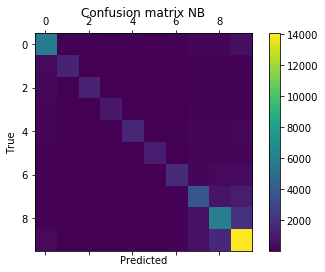

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmnb)
plt.title('Confusion matrix NB')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
accuracy_test = accuracy_score(ratingtest, nbpred)

In [49]:
print('Akurasi testing:',accuracy_test)

Akurasi testing: 0.7016887996131385


In [0]:
dftestnb.to_csv(base_path + 'dftestnb.csv')